In [3]:
%matplotlib inline
import pylab as plt
import numpy as np
from astrometry.util.fits import *
from astrometry.util.plotutils import *
from collections import Counter
from astrometry.util.starutil import *

In [2]:
fn = 'snx3-cut.fits'
if not os.path.exists(fn):
    T=fits_table('snx3.fits')
    for c in ['dtacqnam', 'dtpropid', 'filesize', 'md5sum', 'reference', 'release_date', 'seeing', 'start_date']:
        T.delete_column(c)
    T.writeto(fn)
T = fits_table(fn)

In [3]:
T.about()

tabledata object with 6328 rows and 7 columns:
   archive_file (<class 'numpy.ndarray'>) shape (6328,) dtype <U34
   date_obs (<class 'numpy.ndarray'>) shape (6328,) dtype <U23
   dec (<class 'numpy.ndarray'>) shape (6328,) dtype >f8
   exposure (<class 'numpy.ndarray'>) shape (6328,) dtype >f8
   filter (<class 'numpy.ndarray'>) shape (6328,) dtype <U32
   prodtype (<class 'numpy.ndarray'>) shape (6328,) dtype <U6
   ra (<class 'numpy.ndarray'>) shape (6328,) dtype >f8


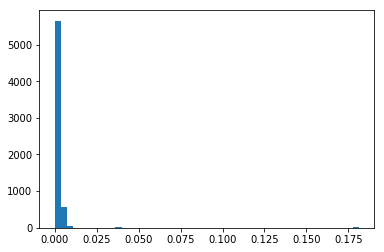

In [4]:
T.dist = np.array([degrees_between(36.45, -4.6, r, d) for r,d in zip(T.ra, T.dec)])
plt.hist(T.dist, 50);
T.cut(T.dist < 0.02)

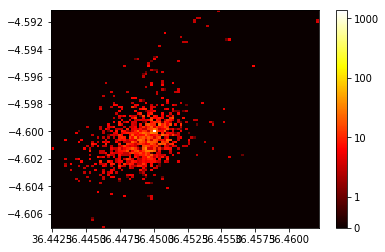

In [5]:
loghist(T.ra, T.dec);

In [6]:
Counter(T.prodtype)

Counter({'dqmask': 2099, 'image ': 2095, 'wtmap ': 2088})

In [7]:
Counter(T.exposure)

Counter({200.0: 2123, 360.0: 2251, 400.0: 1908})

In [8]:
Counter(T.filter)

Counter({'g DECam SDSS c0001 4720.0 1520.0': 2123,
         'i DECam SDSS c0003 7835.0 1470.0': 2251,
         'r DECam SDSS c0002 6415.0 1480.0': 1908})

In [9]:
nersc = open('decam.lst').readlines()

In [10]:
nerscfiles = [x.strip().split('/')[-1] for x in nersc]

In [11]:
nerscfiles[:5]

['c4d_140811_101945_ooi_z_v1.fits.fz',
 'c4d_140809_042348_ooi_z_v1.fits.fz',
 'c4d_140811_101401_ooi_z_v1.fits.fz',
 'c4d_140809_042921_ooi_z_v1.fits.fz',
 'c4d_140809_043148_ooi_z_v1.fits.fz']

In [12]:
T.archive_file[:5]

array(['tu1876531.fits.fz                 ',
       'c4d_121107_043013_ooi_g_a1.fits.fz',
       'tu1876481.fits.fz                 ',
       'c4d_121107_043013_oow_g_a1.fits.fz',
       'tu1876482.fits.fz                 '],
      dtype='<U34')

In [13]:
sn = set(nerscfiles)
len(sn)

49042

In [14]:
st = set([x.strip() for x in T.archive_file])
len(st)

6282

In [15]:
st.intersection(sn)

set()

In [16]:
Counter(zip(T.filter, T.exposure))

Counter({('g DECam SDSS c0001 4720.0 1520.0', 200.0): 2123,
         ('i DECam SDSS c0003 7835.0 1470.0', 360.0): 2251,
         ('r DECam SDSS c0002 6415.0 1480.0', 400.0): 1908})

In [17]:
Counter(T.date_obs).most_common()

[('2015-01-07 01:06:23.817', 12),
 ('2015-01-07 01:10:11.111', 12),
 ('2015-01-07 01:13:58.454', 12),
 ('2015-01-14 00:59:41.52 ', 12),
 ('2015-01-14 01:03:29.03 ', 12),
 ('2015-01-14 01:07:16.506', 12),
 ('2013-09-12 08:54:58.071', 10),
 ('2013-09-29 06:52:02.647', 10),
 ('2014-01-04 02:34:57.347', 10),
 ('2014-01-28 01:03:01.864', 10),
 ('2014-02-04 01:44:20.685', 10),
 ('2013-09-01 04:58:45.897', 9),
 ('2013-09-01 05:02:35.688', 9),
 ('2013-09-01 05:06:24.638', 9),
 ('2013-09-02 09:25:05.216', 9),
 ('2013-09-08 05:21:42.951', 9),
 ('2013-09-08 05:25:32.109', 9),
 ('2013-09-08 05:29:23.007', 9),
 ('2013-09-08 09:27:15.302', 9),
 ('2013-09-10 05:02:06.087', 9),
 ('2013-09-10 05:09:15.897', 9),
 ('2013-09-10 05:16:25.619', 9),
 ('2013-09-12 06:59:07.879', 9),
 ('2013-09-12 07:02:56.758', 9),
 ('2013-09-12 07:06:45.915', 9),
 ('2013-09-12 08:48:29.163', 9),
 ('2013-09-12 09:01:26.574', 9),
 ('2013-09-12 09:07:54.707', 9),
 ('2013-09-24 05:53:59.804', 9),
 ('2013-09-28 04:02:32.701', 9),

In [18]:
len(np.unique(T.date_obs))

1170

In [19]:
T[T.date_obs == '2015-01-07 01:06:23.817'].archive_file

array(['c4d_150107_011031_oow_g_d2.fits.fz',
       'tu4556124.fits.fz                 ',
       'c4d_150107_011031_ood_g_d2.fits.fz',
       'c4d_150107_011031_oow_g_v1.fits.fz',
       'c4d_150107_011031_ooi_g_d2.fits.fz',
       'c4d_150107_011031_ood_g_v1.fits.fz',
       'c4d_150107_011031_ooi_g_v1.fits.fz',
       'c4d_150107_011031_oow_g_a1.fits.fz',
       'c4d_150107_011031_ood_g_a1.fits.fz',
       'c4d_150107_011031_ooi_g_a1.fits.fz',
       'tu4556866.fits.fz                 ',
       'tu4556065.fits.fz                 '],
      dtype='<U34')

In [20]:
I = [f.startswith('c4d') for f in T.archive_file]
Counter(I)
T.cut(I)
len(T)

6143

In [21]:
T.cpver = np.array([f.split('_')[-1].split('.')[0] for f in T.archive_file])

In [22]:
Counter(T.cpver)

Counter({'a1': 564, 'd1': 552, 'd2': 1538, 'v1': 3084, 'v2': 405})

In [23]:
I = np.argsort(T.cpver)
T.cut(list(reversed(I)))

In [24]:
T.cptype = np.array([f.split('_')[3] for f in T.archive_file])
Counter(T.cptype)
T.cut(T.cptype == 'ooi')

In [25]:
d,I = np.unique(T.date_obs, return_index=True)
print(len(I))
T.cut(I)

1149


In [26]:
T.night = np.array([f.split('_')[1] for f in T.archive_file])

In [27]:
len(np.unique(T.night))

192

In [28]:
def onepernight(T, band):
    G = []
    nights = set()
    I, = np.nonzero([f[0] == band for f in T.filter])
    for i in I:
        if T.night[i] in nights:
            continue
        G.append(i)
        nights.add(T.night[i])
    return np.array(G)

In [29]:
G = onepernight(T, 'g')
print(len(G))
R = onepernight(T, 'r')
print(len(R))
I = onepernight(T, 'i')
print(len(I))

109
108
102


In [30]:
T.archive_file[G]

array(['c4d_121107_043013_ooi_g_a1.fits.fz',
       'c4d_121109_024422_ooi_g_a1.fits.fz',
       'c4d_121111_025927_ooi_g_a1.fits.fz',
       'c4d_121119_030817_ooi_g_a1.fits.fz',
       'c4d_121205_034100_ooi_g_d2.fits.fz',
       'c4d_121210_025736_ooi_g_d2.fits.fz',
       'c4d_121216_035058_ooi_g_d2.fits.fz',
       'c4d_121223_041344_ooi_g_d2.fits.fz',
       'c4d_121229_035133_ooi_g_d2.fits.fz',
       'c4d_130105_022318_ooi_g_d2.fits.fz',
       'c4d_130116_012419_ooi_g_d2.fits.fz',
       'c4d_130901_045845_ooi_g_v1.fits.fz',
       'c4d_130908_052142_ooi_g_v1.fits.fz',
       'c4d_130912_065907_ooi_g_v1.fits.fz',
       'c4d_130928_040232_ooi_g_v1.fits.fz',
       'c4d_131002_055814_ooi_g_v1.fits.fz',
       'c4d_131010_050908_ooi_g_v1.fits.fz',
       'c4d_131014_045411_ooi_g_v1.fits.fz',
       'c4d_131026_044420_ooi_g_v1.fits.fz',
       'c4d_131030_023251_ooi_g_v1.fits.fz',
       'c4d_131106_032758_ooi_g_v1.fits.fz',
       'c4d_131111_034717_ooi_g_v1.fits.fz',
       'c4

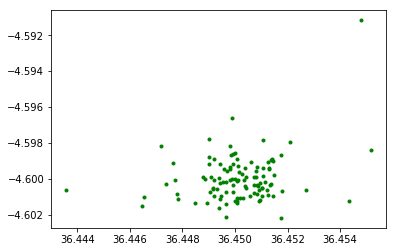

In [31]:
plt.plot(T.ra[G], T.dec[G], 'g.');

In [32]:
files = np.hstack((T.archive_file[G[-25:]], T.archive_file[R[-25:]], T.archive_file[I[-25:]]))
files = list(files) + [f.replace('_ooi_','_ood_') for f in files] + [f.replace('_ooi_','_oow_') for f in files]
print('(' + ','.join("'%s'" % d for d in files) + ')')

('c4d_160825_062109_ooi_g_v1.fits.fz','c4d_160831_061614_ooi_g_v1.fits.fz','c4d_160905_053747_ooi_g_v2.fits.fz','c4d_160911_072801_ooi_g_v2.fits.fz','c4d_160914_063810_ooi_g_v2.fits.fz','c4d_160922_042717_ooi_g_v2.fits.fz','c4d_160926_062619_ooi_g_v2.fits.fz','c4d_161002_034809_ooi_g_v2.fits.fz','c4d_161009_023340_ooi_g_v2.fits.fz','c4d_161020_023748_ooi_g_v2.fits.fz','c4d_161025_030033_ooi_g_v2.fits.fz','c4d_161102_014802_ooi_g_v1.fits.fz','c4d_161109_020025_ooi_g_v1.fits.fz','c4d_161117_011311_ooi_g_v1.fits.fz','c4d_161122_044720_ooi_g_v1.fits.fz','c4d_161126_020400_ooi_g_v1.fits.fz','c4d_161201_005409_ooi_g_v1.fits.fz','c4d_161208_014128_ooi_g_v1.fits.fz','c4d_161217_035306_ooi_g_v1.fits.fz','c4d_161222_015251_ooi_g_v1.fits.fz','c4d_161228_014204_ooi_g_v1.fits.fz','c4d_170103_021606_ooi_g_v2.fits.fz','c4d_170117_010414_ooi_g_v1.fits.fz','c4d_170125_005949_ooi_g_v1.fits.fz','c4d_170129_010824_ooi_g_v1.fits.fz','c4d_160905_061034_ooi_r_v2.fits.fz','c4d_160911_080833_ooi_r_v2.fits.fz',

In [33]:
files = np.hstack((T.archive_file[G[-30:-25]], T.archive_file[R[-30:-25]], T.archive_file[I[-30:-25]]))
files = list(files) + [f.replace('_ooi_','_ood_') for f in files] + [f.replace('_ooi_','_oow_') for f in files]
print('(' + ','.join("'%s'" % d for d in files) + ')')

('c4d_160107_014645_ooi_g_v1.fits.fz','c4d_160113_024959_ooi_g_v1.fits.fz','c4d_160121_010345_ooi_g_v1.fits.fz','c4d_160814_085515_ooi_g_v1.fits.fz','c4d_160824_062237_ooi_g_v1.fits.fz','c4d_160119_023138_ooi_r_v1.fits.fz','c4d_160814_083528_ooi_r_v1.fits.fz','c4d_160824_065348_ooi_r_v1.fits.fz','c4d_160825_063720_ooi_r_v1.fits.fz','c4d_160831_071112_ooi_r_v1.fits.fz','c4d_160814_080048_ooi_i_v1.fits.fz','c4d_160824_071610_ooi_i_v1.fits.fz','c4d_160825_073837_ooi_i_v1.fits.fz','c4d_160826_061048_ooi_i_v1.fits.fz','c4d_160902_055141_ooi_i_v1.fits.fz','c4d_160107_014645_ood_g_v1.fits.fz','c4d_160113_024959_ood_g_v1.fits.fz','c4d_160121_010345_ood_g_v1.fits.fz','c4d_160814_085515_ood_g_v1.fits.fz','c4d_160824_062237_ood_g_v1.fits.fz','c4d_160119_023138_ood_r_v1.fits.fz','c4d_160814_083528_ood_r_v1.fits.fz','c4d_160824_065348_ood_r_v1.fits.fz','c4d_160825_063720_ood_r_v1.fits.fz','c4d_160831_071112_ood_r_v1.fits.fz','c4d_160814_080048_ood_i_v1.fits.fz','c4d_160824_071610_ood_i_v1.fits.fz',

In [1]:
T = fits_table('survey-ccds-snx3.fits.gz')

In [4]:
from collections import Counter
Counter(T.filter)

Counter({'g   ': 1793, 'r   ': 1794, 'i   ': 1671})

In [7]:
len(set(T.expnum))

88

In [9]:
e,E = np.unique(T.expnum, return_index=True)
Counter(T.filter[E])

Counter({'g   ': 30, 'r   ': 30, 'i   ': 28})

In [18]:
EG = T[E][T.filter[E] == 'g   ']
ER = T[E][T.filter[E] == 'r   ']
EI = T[E][T.filter[E] == 'i   ']

In [19]:
len(EG), len(ER), len(EI)

(30, 30, 28)

In [14]:
EG.mjd_obs

array([57394.07123591, 57400.11514296, 57408.04138326, 57614.36879513,
       57624.26282349, 57625.26177827, 57631.25838703, 57636.23166751,
       57642.30820394, 57645.27360077, 57653.18272374, 57657.26538813,
       57663.1555447 , 57670.10377012, 57681.10668812, 57686.12248009,
       57694.07214291, 57701.08075502, 57709.04793107, 57714.19666554,
       57718.08324925, 57723.03478573, 57730.06756975, 57739.15897183,
       57744.07547089, 57750.06798035, 57756.0916072 , 57770.04171705,
       57778.0386646 , 57782.04461219])

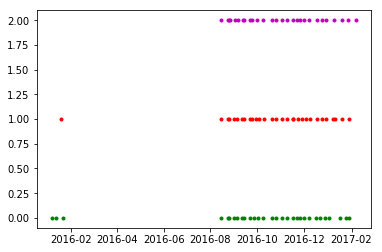

In [22]:
from astrometry.util.starutil_numpy import *
plt.plot([mjdtodate(m) for m in EG.mjd_obs], [0]*len(EG), 'g.')
plt.plot([mjdtodate(m) for m in ER.mjd_obs], [1]*len(ER), 'r.')
plt.plot([mjdtodate(m) for m in EI.mjd_obs], [2]*len(EI), 'm.')

In [23]:
EG.mjd_obs.min()

57394.07123591

In [26]:
T = fits_table('survey-ccds-snx3-25.fits.gz')
len(T)

150

In [25]:
e,E = np.unique(T.expnum, return_index=True)
Counter(T.filter[E])

Counter({'i   ': 25, 'r   ': 25, 'g   ': 25})

In [27]:
EG = T[E][T.filter[E] == 'g   ']
ER = T[E][T.filter[E] == 'r   ']
EI = T[E][T.filter[E] == 'i   ']

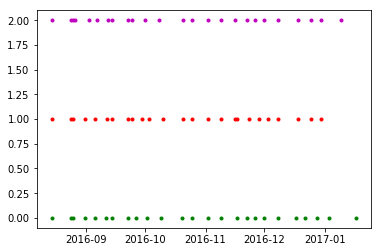

In [28]:
plt.plot([mjdtodate(m) for m in EG.mjd_obs], [0]*len(EG), 'g.')
plt.plot([mjdtodate(m) for m in ER.mjd_obs], [1]*len(ER), 'r.')
plt.plot([mjdtodate(m) for m in EI.mjd_obs], [2]*len(EI), 'm.');

In [30]:
Counter(EG.exptime), Counter(ER.exptime), Counter(EI.exptime)

(Counter({200.0: 25}), Counter({400.0: 25}), Counter({360.0: 25}))

1.553469934463501 1.4676635951995851 1.348712597846985


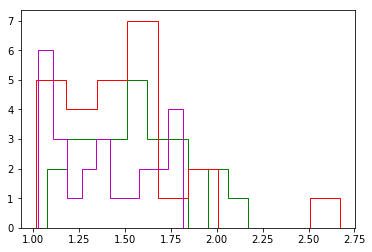

In [34]:
plt.hist(EG.fwhm * 0.262, histtype='step', color='g');
plt.hist(ER.fwhm * 0.262, histtype='step', color='r');
plt.hist(EI.fwhm * 0.262, histtype='step', color='m');
print(np.median(EG.fwhm)* 0.262,
    np.median(ER.fwhm)* 0.262,
    np.median(EI.fwhm)* 0.262)


In [36]:
EG.ccdzpt.min(), EG.ccdzpt.max()

(24.84484, 25.098766)

In [37]:
ER.ccdzpt.min(), ER.ccdzpt.max()

(24.855314, 25.31969)

In [38]:
EI.ccdzpt.min(), EI.ccdzpt.max()

(25.202745, 25.293486)

In [45]:
from tractor import NanoMaggies

for e in merge_tables([EG, ER, EI]):
    psf_sigma = e.fwhm / 2.35
    psfnorm = 1./(2. * np.sqrt(np.pi) * psf_sigma)
    zpscale = NanoMaggies.zeropointToScale(e.ccdzpt + 2.5*np.log10(e.exptime))
    detsig1 = (e.sig1/zpscale) / psfnorm
    psfdepth = -2.5 * (np.log10(5. * detsig1) - 9)
    print('%s & %i & %s & %i & %.2f & %.2f' % (e.filter, e.expnum, str(mjdtodate(e.mjd_obs).date()), e.exptime, e.fwhm*0.262,
                                          psfdepth))
    

g    & 563982 & 2016-08-14 & 200 & 1.28 & 24.65
g    & 566968 & 2016-08-24 & 200 & 1.79 & 23.02
g    & 567422 & 2016-08-25 & 200 & 1.72 & 23.55
g    & 569591 & 2016-08-31 & 200 & 1.55 & 24.39
g    & 571049 & 2016-09-05 & 200 & 1.67 & 24.29
g    & 573546 & 2016-09-11 & 200 & 1.42 & 24.49
g    & 574702 & 2016-09-14 & 200 & 2.17 & 22.75
g    & 575794 & 2016-09-22 & 200 & 1.20 & 24.17
g    & 577432 & 2016-09-26 & 200 & 1.55 & 24.47
g    & 579874 & 2016-10-02 & 200 & 1.37 & 24.51
g    & 582140 & 2016-10-09 & 200 & 1.61 & 23.56
g    & 584106 & 2016-10-20 & 200 & 1.64 & 24.05
g    & 585888 & 2016-10-25 & 200 & 2.00 & 24.11
g    & 588620 & 2016-11-02 & 200 & 1.39 & 24.43
g    & 591449 & 2016-11-09 & 200 & 1.47 & 23.53
g    & 593383 & 2016-11-17 & 200 & 1.53 & 24.39
g    & 595093 & 2016-11-22 & 200 & 1.45 & 24.48
g    & 596474 & 2016-11-26 & 200 & 1.07 & 24.80
g    & 598232 & 2016-12-01 & 200 & 1.96 & 23.91
g    & 600846 & 2016-12-08 & 200 & 1.20 & 23.69
g    & 601468 & 2016-12-17 & 200 & 1.32 